C:\Users\Almazt\AppData\Local\Temp\ipykernel_16140\3440539740.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


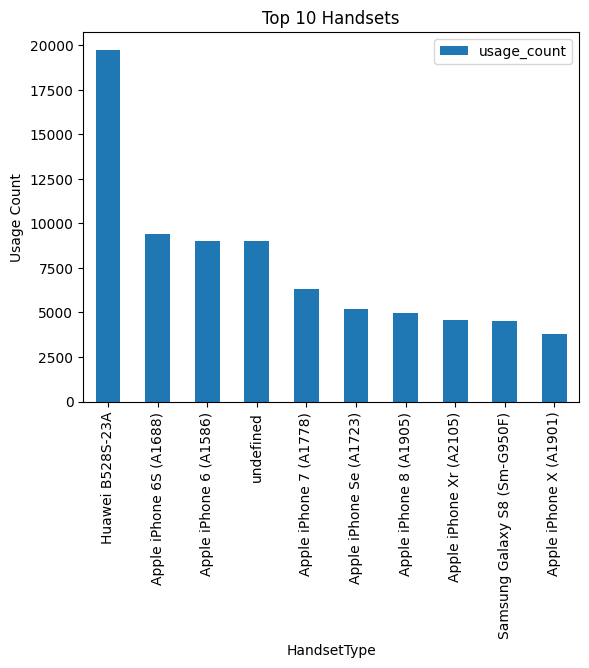

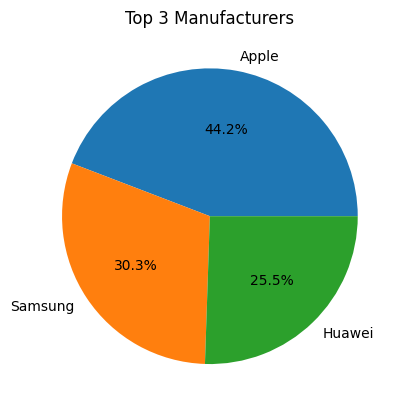

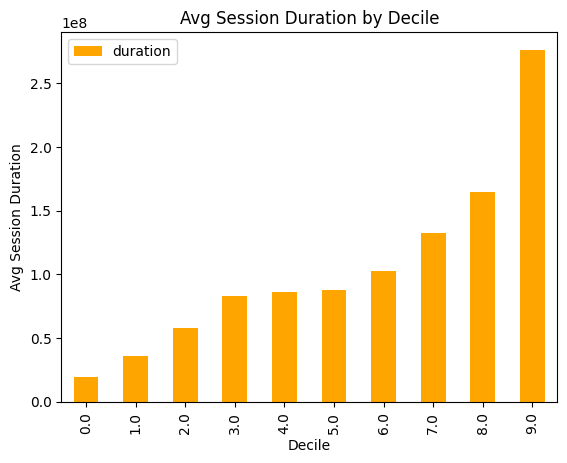

In [1]:
# Utilize the matplotlib and seaborn libraries to create plots.
# Handset Statistics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

# Connect to psycopg2 database (or create it if it doesn't exist)
from sqlalchemy import create_engine

connection = psycopg2.connect("dbname=Teleco user=postgres password=Leul@123")

# Create a cursor object to interact with the database
cursor = connection.cursor()

# Query the data
query = "SELECT * FROM xdr_data"

# Load data into a pandas DataFrame
df = pd.read_sql_query(query, connection)

# Plot top handsets

top_handsets = df['HandsetType'].value_counts().head(10).reset_index()
top_handsets.columns = ['HandsetType', 'usage_count']

top_handsets.plot(kind='bar', x='HandsetType', y='usage_count', title='Top 10 Handsets')
plt.ylabel('Usage Count')
plt.show()

# Plot top 3 manufacturers
# Assuming top_manufacturers is a DataFrame created with the necessary data
# Example:
top_manufacturers = df['Manufacturer'].value_counts().head(3).reset_index()
top_manufacturers.columns = ['Manufacturer', 'usage_count']

# Pie plot for top 3 manufacturers
top_manufacturers.plot(kind='pie', y='usage_count', 
                       labels=top_manufacturers['Manufacturer'], 
                       autopct='%1.1f%%', legend=False)

plt.title('Top 3 Manufacturers')  # Set title separately
plt.ylabel('')  # Optional: Remove default label to clean up plot
plt.show()

# Decile Plot

# Create deciles
df['Duration_Decile'] = pd.qcut(df['duration'], 10, labels=False)
decile_summary = df.groupby('Duration_Decile')['duration'].mean().reset_index()

# Visualize decile analysis
decile_summary.plot(x='Duration_Decile', y='duration', kind='bar', color='orange', title='Avg Session Duration by Decile')
plt.xlabel('Decile')
plt.ylabel('Avg Session Duration')
plt.show()
